<a href="https://colab.research.google.com/github/sanjanajy/Deep-learning-project/blob/main/vgg16_major_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training the model (1)


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths
train_dir = "/content/drive/MyDrive/Major project/Training"
test_dir = "/content/drive/MyDrive/Major project/Testing"

# Check dataset structure
print("Training classes:", os.listdir(train_dir))
print("Testing classes:", os.listdir(test_dir))

# Step 2: Import Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Step 3: Data Preprocessing (Augmentation & Loading)
IMG_SIZE = (224, 224)  # VGG16 input size
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load Testing Data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Step 4: Model Building using VGG16
# Load VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes: Glioma, Meningioma, Notumor, Pituitary

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Step 5: Model Training
EPOCHS = 20

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Mounted at /content/drive
Training classes: ['pituitary', 'notumor', 'meningioma', 'glioma']
Testing classes: ['pituitary', 'notumor', 'glioma', 'meningioma']
Found 4579 images belonging to 4 classes.
Found 1143 images belonging to 4 classes.
Found 1312 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1401s 10s/step - accuracy: 0.2615 - loss: 1.4700 - val_accuracy: 0.4751 - val_loss: 1.3075
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 657ms/step - accuracy: 0.4122 - loss: 1.2849 - val_accuracy: 0.5337 - val_loss: 1.2337
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 659ms/step - accuracy: 0.5297 - loss: 1.1529 - val_accuracy: 0.5993 - val_loss: 1.1662
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 657ms/step - accuracy: 0.5952 - loss: 1.0785 - val_accuracy: 0.6220 - val_loss: 1.1082
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 661ms/step - accuracy: 0.6433 - loss: 0.9860 - val_accuracy: 0.6553 - val_loss: 1.0669
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 660ms/step - accuracy: 0.6701 - loss: 0.9234 - val_accuracy: 0.6448 - val_loss: 1.0289
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 660ms/step - accuracy: 0.6931 - loss: 0.8817 - val_accuracy: 0.6535 - val_loss: 0.9870
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 95s 662ms/step - accuracy: 0.7198 - loss: 0

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Dataset** **Information**

In [39]:
import os

# Paths to your training and testing datasets
train_path = "/content/drive/MyDrive/Major project/Training"
test_path = "/content/drive/MyDrive/Major project/Testing"

def count_images(dataset_path, dataset_name):
    """Counts and displays the number of images in each class."""
    print(f"\n📊 Number of Images in Each Class - {dataset_name} Set:")
    for cls in sorted(os.listdir(dataset_path)):  # Sort for better readability
        class_folder = os.path.join(dataset_path, cls)
        if os.path.isdir(class_folder):
            count = len(os.listdir(class_folder))
            print(f"🔹 {cls}: {count} images")

# Count images in both datasets
count_images(train_path, "Training")
count_images(test_path, "Testing")



📊 Number of Images in Each Class - Training Set:
🔹 glioma: 1321 images
🔹 meningioma: 1349 images
🔹 notumor: 1595 images
🔹 pituitary: 1457 images

📊 Number of Images in Each Class - Testing Set:
🔹 glioma: 300 images
🔹 meningioma: 306 images
🔹 notumor: 405 images
🔹 pituitary: 301 images


# **Final** **Training**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training classes: ['pituitary', 'notumor', 'meningioma', 'glioma']
Testing classes: ['pituitary', 'notumor', 'glioma', 'meningioma']
Found 4579 images belonging to 4 classes.
Found 1143 images belonging to 4 classes.
Found 1312 images belonging to 4 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 14,879,428 (56.76 MB)

 Trainable params: 7,244,164 (27.63 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5212 - loss: 1.0502
Epoch 1: val_accuracy improved from -inf to 0.76028, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 1494s 10s/step - accuracy: 0.5222 - loss: 1.0485 - val_accuracy: 0.7603 - val_loss: 0.6401 - learning_rate: 1.0000e-04
Epoch 2/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8495 - loss: 0.4326
Epoch 2: val_accuracy improved from 0.76028 to 0.77603, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 107s 746ms/step - accuracy: 0.8496 - loss: 0.4324 - val_accuracy: 0.7760 - val_loss: 0.6324 - learning_rate: 1.0000e-04
Epoch 3/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.8906 - loss: 0.3120
Epoch 3: val_accuracy improved from 0.77603 to 0.81015, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 105s 731ms/step - accuracy: 0.8906 - loss: 0.3119 - val_accuracy: 0.8101 - val_loss: 0.5297 - learning_rate: 1.0000e-04
Epoch 4/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9029 - loss: 0.2858
Epoch 4: val_accuracy improved from 0.81015 to 0.87052, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 105s 728ms/step - accuracy: 0.9029 - loss: 0.2858 - val_accuracy: 0.8705 - val_loss: 0.3853 - learning_rate: 1.0000e-04
Epoch 5/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9169 - loss: 0.2345
Epoch 5: val_accuracy improved from 0.87052 to 0.87489, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 106s 728ms/step - accuracy: 0.9169 - loss: 0.2345 - val_accuracy: 0.8749 - val_loss: 0.4405 - learning_rate: 1.0000e-04
Epoch 6/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9260 - loss: 0.2252
Epoch 6: val_accuracy improved from 0.87489 to 0.89239, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 106s 734ms/step - accuracy: 0.9261 - loss: 0.2250 - val_accuracy: 0.8924 - val_loss: 0.3359 - learning_rate: 1.0000e-04
Epoch 7/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.9365 - loss: 0.1897
Epoch 7: val_accuracy improved from 0.89239 to 0.89676, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 141s 735ms/step - accuracy: 0.9365 - loss: 0.1897 - val_accuracy: 0.8968 - val_loss: 0.3246 - learning_rate: 1.0000e-04
Epoch 8/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9500 - loss: 0.1502
Epoch 8: val_accuracy did not improve from 0.89676
144/144 ━━━━━━━━━━━━━━━━━━━━ 104s 723ms/step - accuracy: 0.9500 - loss: 0.1503 - val_accuracy: 0.8058 - val_loss: 0.7884 - learning_rate: 1.0000e-04
Epoch 9/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9384 - loss: 0.1822
Epoch 9: val_accuracy did not improve from 0.89676
144/144 ━━━━━━━━━━━━━━━━━━━━ 102s 710ms/step - accuracy: 0.9384 - loss: 0.1820 - val_accuracy: 0.8933 - val_loss: 0.3455 - learning_rate: 1.0000e-04
Epoch 10/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9485 - loss: 0.1415
Epoch 10: val_accuracy did not improve from 0.89676
144/144 ━━━━━━━━━━━━━━━━━━━━ 103s 714ms/step - accuracy: 0.9485 - loss: 0.1415 - val_accuracy: 0.8959 - val_loss: 0.3208 - learning_ra

144/144 ━━━━━━━━━━━━━━━━━━━━ 105s 727ms/step - accuracy: 0.9336 - loss: 0.1917 - val_accuracy: 0.9116 - val_loss: 0.3245 - learning_rate: 1.0000e-04
Epoch 13/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9661 - loss: 0.1007
Epoch 13: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 13: val_accuracy did not improve from 0.91164
144/144 ━━━━━━━━━━━━━━━━━━━━ 124s 860ms/step - accuracy: 0.9661 - loss: 0.1007 - val_accuracy: 0.8959 - val_loss: 0.3782 - learning_rate: 1.0000e-04
Epoch 14/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9764 - loss: 0.0702
Epoch 14: val_accuracy did not improve from 0.91164
144/144 ━━━━━━━━━━━━━━━━━━━━ 103s 714ms/step - accuracy: 0.9764 - loss: 0.0702 - val_accuracy: 0.9116 - val_loss: 0.3738 - learning_rate: 2.0000e-05
Epoch 15/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9801 - loss: 0.0614
Epoch 15: val_accuracy improved from 0.91164 to 0.92388, saving model to /content/drive/MyDrive/Major p

144/144 ━━━━━━━━━━━━━━━━━━━━ 104s 720ms/step - accuracy: 0.9801 - loss: 0.0614 - val_accuracy: 0.9239 - val_loss: 0.3155 - learning_rate: 2.0000e-05
Epoch 16/25
143/144 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9781 - loss: 0.0680
Epoch 16: val_accuracy did not improve from 0.92388
144/144 ━━━━━━━━━━━━━━━━━━━━ 102s 708ms/step - accuracy: 0.9781 - loss: 0.0679 - val_accuracy: 0.9116 - val_loss: 0.3636 - learning_rate: 2.0000e-05
Epoch 17/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.9785 - loss: 0.0620
Epoch 17: val_accuracy did not improve from 0.92388
144/144 ━━━━━━━━━━━━━━━━━━━━ 102s 709ms/step - accuracy: 0.9785 - loss: 0.0620 - val_accuracy: 0.9230 - val_loss: 0.3043 - learning_rate: 2.0000e-05
Epoch 18/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9792 - loss: 0.0604
Epoch 18: val_accuracy did not improve from 0.92388
144/144 ━━━━━━━━━━━━━━━━━━━━ 101s 701ms/step - accuracy: 0.9792 - loss: 0.0604 - val_accuracy: 0.9108 - val_loss: 0.3480 - learnin

144/144 ━━━━━━━━━━━━━━━━━━━━ 144s 717ms/step - accuracy: 0.9878 - loss: 0.0421 - val_accuracy: 0.9291 - val_loss: 0.2845 - learning_rate: 1.0000e-05
Epoch 24/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.9860 - loss: 0.0466
Epoch 24: val_accuracy improved from 0.92913 to 0.93438, saving model to /content/drive/MyDrive/Major project/vgg16_trained_model.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 104s 721ms/step - accuracy: 0.9860 - loss: 0.0466 - val_accuracy: 0.9344 - val_loss: 0.2979 - learning_rate: 1.0000e-05


Model saved successfully at: /content/drive/MyDrive/Major project/vgg16_trained_model.h5
41/41 ━━━━━━━━━━━━━━━━━━━━ 415s 10s/step - accuracy: 0.9437 - loss: 0.2311
Test Accuracy: 94.44%


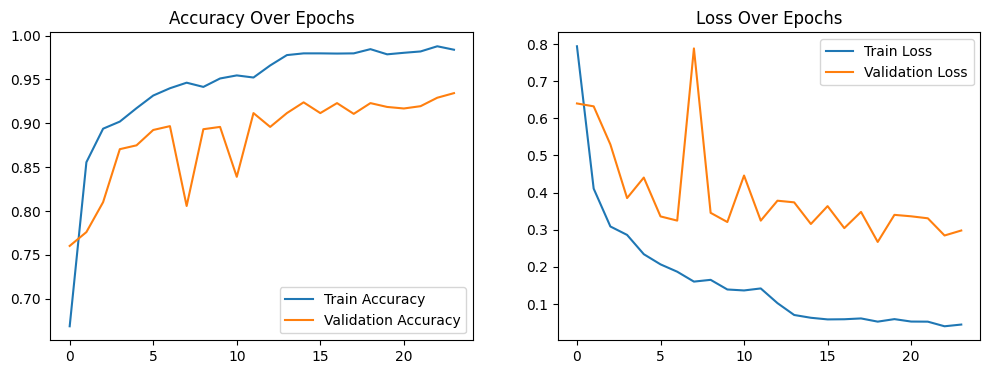

In [ ]:

# Step 1: Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Define dataset paths (Make sure this is correct)
train_dir = "/content/drive/MyDrive/Major project/Training"
test_dir = "/content/drive/MyDrive/Major project/Testing"

# Check if dataset is accessible
print("Training classes:", os.listdir(train_dir))
print("Testing classes:", os.listdir(test_dir))

# Step 2: Import Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Step 3: Data Preprocessing & Augmentation
IMG_SIZE = (224, 224)  # VGG16 input size
BATCH_SIZE = 32

# Data Augmentation to improve accuracy
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training & Validation Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load Testing Data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Step 4: Model Building (VGG16 Fine-tuned)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # Fine-tune last layers

# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[:-5]:  # Unfreezing only last 5 layers
    layer.trainable = False

# Add custom layers after the VGG16 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to a single vector

# Fully connected layers with proper connections
x = Dense(256, activation='relu')(x)  # Increased neurons for better learning
x = Dropout(0.4)(x)  # Dropout to prevent overfitting

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer (4 classes)
output = Dense(4, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


# Step 5: Callbacks for Best Model Selection
checkpoint_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.h5"

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.00001),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
]

# Step 6: Model Training
EPOCHS = 25

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Step 7: Save the Model for Future Use
model.save(checkpoint_path)
print("Model saved successfully at:", checkpoint_path)

# Step 8: Model Evaluation on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 9: Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


# Compiling the model after retrieving

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set image size
IMG_SIZE = (224, 224)




# Load the existing trained model
model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.h5"
model = load_model(model_path, compile=False)  # Load without compilation

# Save the model in .keras format
new_model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.keras"
model.save(new_model_path)

print(f"Model successfully converted and saved at: {new_model_path}")



# Load model without compiling
model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.keras"
model = load_model(model_path, compile=False)

# Recompile with proper metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check if metrics are set correctly
print(model.metrics_names)  # Should show ['loss', 'accuracy']


from tensorflow.keras.optimizers import Adam

# Load the trained model
model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.keras"
model = load_model(model_path)

# Compile the model (important to remove warnings)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

print("Model loaded and compiled successfully!")






Model successfully converted and saved at: /content/drive/MyDrive/Major project/vgg16_trained_model.keras
['loss', 'compile_metrics']
Model loaded and compiled successfully!


In [7]:
# Print model metrics
print(model.metrics)
print(model.metrics_names)


[<Mean name=loss>, <CompileMetrics name=compile_metrics>]
['loss', 'compile_metrics']


## **CLassification(Upload the image)**

Saving Te-gl_0014.jpg to Te-gl_0014.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: glioma (Confidence: 100.00%)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


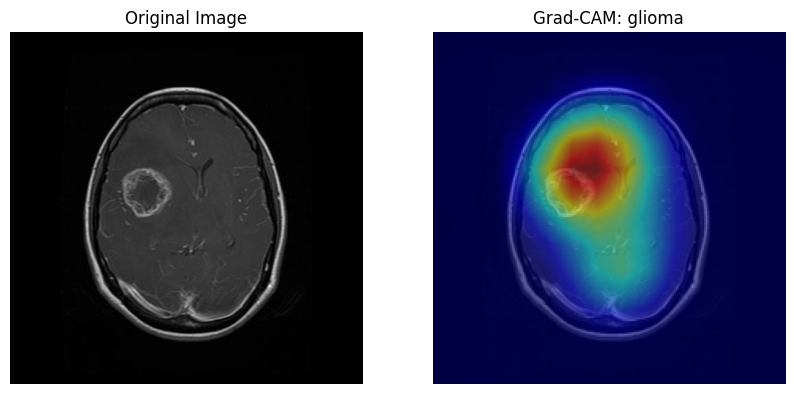

In [11]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Suppress retracing warnings
tf.get_logger().setLevel('ERROR')

# 🔹 Function to generate Grad-CAM
def grad_cam(model, img_array, class_index):
    """ Generates a Grad-CAM heatmap for a given image array and class index. """

    # Extract last convolutional layer
    last_conv_layer = model.get_layer("block5_conv3")  # Change if needed

    # Create a model that maps input to conv-layer output & predictions
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[last_conv_layer.output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_output)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Convert tensors to NumPy
    conv_output = conv_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # Apply gradients to feature maps
    for i in range(pooled_grads.shape[0]):
        conv_output[:, :, i] *= pooled_grads[i]

    # Generate heatmap
    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Normalize

    return heatmap

# 🔹 Function to overlay Grad-CAM on image
def overlay_gradcam(image_path, heatmap, alpha=0.5):
    """ Overlays Grad-CAM heatmap on the original image. """
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    return superimposed_img

# 🔹 Function to load and preprocess image
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# 🔹 Load trained model
model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.keras"
model = tf.keras.models.load_model(model_path)

# 🔹 Upload image and process
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded image filename
img_array = preprocess_image(image_path)

# 🔹 Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = ['glioma', 'meningioma', 'no tumor', 'pituitary']  # Adjust as needed
prediction_label = class_labels[predicted_class]
confidence = predictions[0][predicted_class] * 100

# 🔹 Print prediction
print(f"Prediction: {prediction_label} (Confidence: {confidence:.2f}%)")

# 🔹 Generate Grad-CAM
heatmap = grad_cam(model, img_array, predicted_class)
gradcam_result = overlay_gradcam(image_path, heatmap)

# 🔹 Display results (Original + Grad-CAM)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Convert BGR to RGB
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(gradcam_result[:, :, ::-1])  # Convert BGR to RGB
plt.axis('off')
plt.title(f"Grad-CAM: {prediction_label}")

plt.show()


Saving glioma.jpg to glioma (1).jpg


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


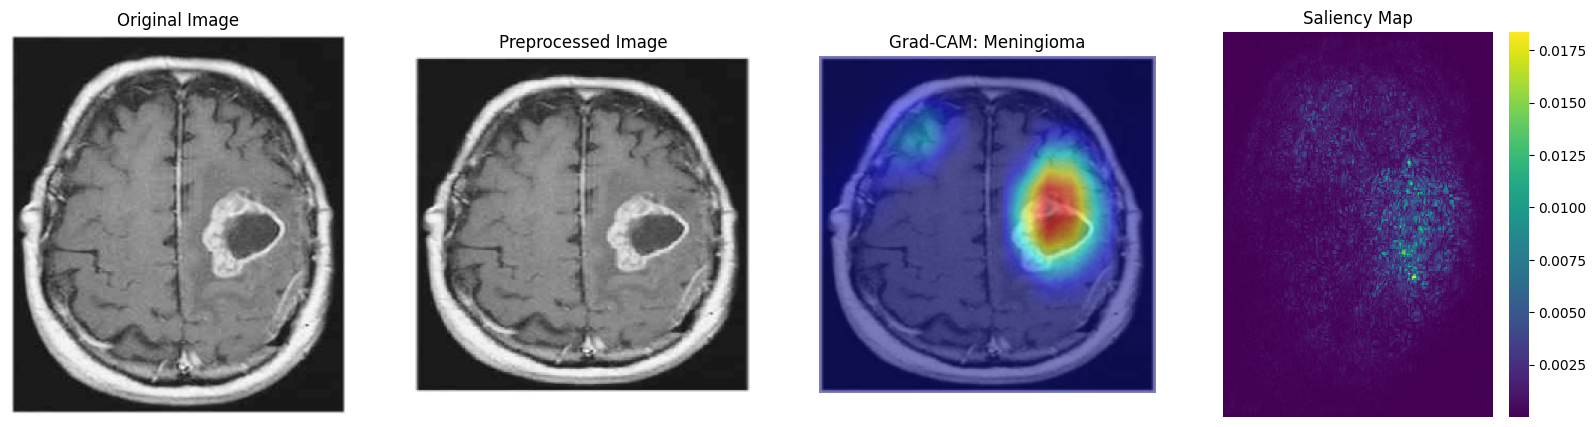

✅ Model Confidence: 97.38% - Prediction is likely reliable.
🟢 Model prediction and visualizations are consistent. Results are likely accurate.


In [37]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Suppress retracing warnings
tf.get_logger().setLevel('ERROR')

# 🔹 Function to generate Grad-CAM
def grad_cam(model, img_array, class_index):
    """ Generates a Grad-CAM heatmap for a given image array and class index. """

    # Extract last convolutional layer
    last_conv_layer = model.get_layer("block5_conv3")  # Change if needed

    # Create a model that maps input to conv-layer output & predictions
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[last_conv_layer.output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_output)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Convert tensors to NumPy
    conv_output = conv_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    # Apply gradients to feature maps
    for i in range(pooled_grads.shape[0]):
        conv_output[:, :, i] *= pooled_grads[i]

    # Generate heatmap
    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Normalize

    return heatmap

# 🔹 Function to overlay Grad-CAM on image
def overlay_gradcam(image_path, heatmap, alpha=0.5):
    """ Overlays Grad-CAM heatmap on the original image. """
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    return superimposed_img

# 🔹 Function to create a saliency map
def saliency_map(model, img_array):
    """ Generates a saliency map to cross-check Grad-CAM """
    img_array = tf.convert_to_tensor(img_array)
    img_array = tf.Variable(img_array, dtype=float)

    with tf.GradientTape() as tape:
        tape.watch(img_array)
        predictions = model(img_array)
        class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, img_array)
    grads = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    return grads.numpy()

# 🔹 Function to load and preprocess image
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0).astype('float32') / 255.0  # Normalize

    return img, {"input_layer_1": tf.convert_to_tensor(img_array, dtype=tf.float32)}

# 🔹 Load trained model
model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.keras"
model = tf.keras.models.load_model(model_path)

# 🔹 Upload image and process
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded image filename
preprocessed_img, img_array = preprocess_image(image_path)

# 🔹 Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']  # Adjust as needed
prediction_label = class_labels[predicted_class]
confidence = predictions[0][predicted_class] * 100

# 🔹 Generate Grad-CAM
heatmap = grad_cam(model, img_array, predicted_class)
gradcam_result = overlay_gradcam(image_path, heatmap)

# 🔹 Generate Saliency Map
saliency = saliency_map(model, img_array["input_layer_1"])

# 🔹 Display results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Convert BGR to RGB
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(preprocessed_img)
plt.axis('off')
plt.title("Preprocessed Image")

plt.subplot(1, 4, 3)
plt.imshow(gradcam_result[:, :, ::-1])  # Convert BGR to RGB
plt.axis('off')
plt.title(f"Grad-CAM: {prediction_label}")

plt.subplot(1, 4, 4)
sns.heatmap(saliency, cmap='viridis', cbar=True)
plt.axis('off')
plt.title("Saliency Map")

plt.show()

# 🔹 Confidence & Uncertainty Check
if confidence < 80:
    print(f"⚠️ Warning: Model is uncertain about this prediction ({confidence:.2f}%). Consider verifying with additional scans.")
else:
    print(f"✅ Model Confidence: {confidence:.2f}% - Prediction is likely reliable.")

# 🔹 Grad-CAM & Saliency Comparison
gradcam_focus = np.sum(heatmap > 0.5)
saliency_focus = np.sum(saliency > 0.5)

if abs(gradcam_focus - saliency_focus) > 5000:  # Threshold for mismatch
    print("🔴 Caution: Grad-CAM and Saliency Map are highlighting different regions. Please review manually!")
elif confidence < 80:
    print("🟡 The model is slightly uncertain. Cross-checking is recommended.")
else:
    print("🟢 Model prediction and visualizations are consistent. Results are likely accurate.")


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')




# **Performance evaluation**

41/41 ━━━━━━━━━━━━━━━━━━━━ 782s 19s/step

📌 **Model Performance Summary**
✅ **Overall Accuracy:** 95.12%

📌 **Metric Breakdown (Per Class):**
              precision    recall  f1-score     support
glioma         0.967972  0.906667  0.936317   300.00000
meningioma     0.930233  0.915033  0.922570   306.00000
notumor        0.975309  0.975309  0.975309   405.00000
pituitary      0.926154  1.000000  0.961661   301.00000
accuracy       0.951220  0.951220  0.951220     0.95122
macro avg      0.949917  0.949252  0.948964  1312.00000
weighted avg   0.951841  0.951220  0.950962  1312.00000

📌 **What These Metrics Mean:**

✔ **Accuracy** - The overall correctness of the model.
✔ **Precision** - Out of all the positive predictions, how many were correct?
✔ **Recall** - Out of all actual positives, how many did the model correctly identify?
✔ **F1-Score** - A balance between Precision & Recall.


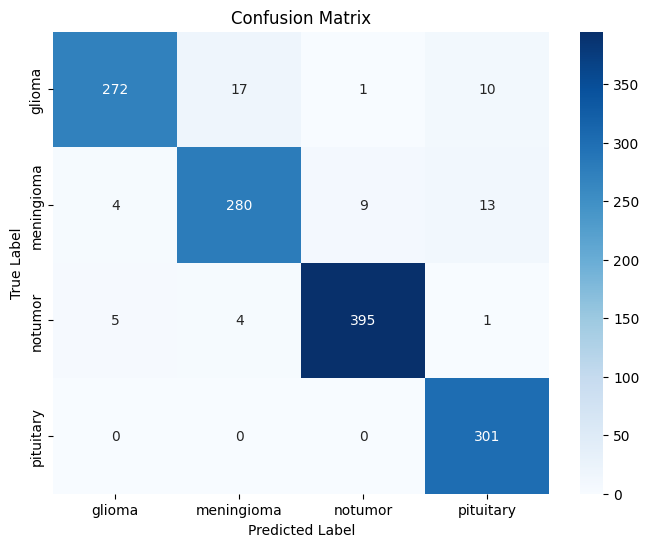


📌 **Evaluator Insights:**

🟢 **If Accuracy > 90%**: Model is performing very well!
🟡 **If Accuracy 80-90%**: Model is good, but some misclassifications exist.
🔴 **If Accuracy < 80%**: Need to fine-tune the model.

💡 **Grad-CAM can further explain how the model is making predictions visually!**


In [38]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # ✅ FIXED: Import pandas
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import os

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# ✅ Load the trained model
model_path = "/content/drive/MyDrive/Major project/vgg16_trained_model.keras"
model = tf.keras.models.load_model(model_path)

# ✅ Load and preprocess the test dataset
test_data_path = "/content/drive/MyDrive/Major project/Testing"

# Function to load and preprocess images from test set
def load_test_data(test_data_path, img_size=(224, 224)):
    X_test, y_test = [], []
    class_labels = os.listdir(test_data_path)  # Folder names = class labels
    class_labels.sort()

    for class_index, class_name in enumerate(class_labels):
        class_path = os.path.join(test_data_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size) / 255.0  # Normalize
            X_test.append(img)
            y_test.append(class_index)

    return np.array(X_test), np.array(y_test), class_labels

# ✅ Load Test Data
X_test, y_test, class_labels = load_test_data(test_data_path)

# ✅ Make Predictions
y_pred_probs = model.predict(X_test)  # Probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# ✅ Classification Report
report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Function to plot Confusion Matrix
def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# ✅ Display Performance Metrics
print("\n📌 **Model Performance Summary**")
print("=" * 40)
print(f"✅ **Overall Accuracy:** {report_df.loc['accuracy', 'precision'] * 100:.2f}%\n")
print("📌 **Metric Breakdown (Per Class):**")
print(report_df)

# ✅ Explanation for Evaluator
print("\n📌 **What These Metrics Mean:**\n")
print("✔ **Accuracy** - The overall correctness of the model.")
print("✔ **Precision** - Out of all the positive predictions, how many were correct?")
print("✔ **Recall** - Out of all actual positives, how many did the model correctly identify?")
print("✔ **F1-Score** - A balance between Precision & Recall.")

# ✅ Display Confusion Matrix
plot_confusion_matrix(conf_matrix, class_labels)

# ✅ Additional Insights for Evaluator
print("\n📌 **Evaluator Insights:**\n")
print("🟢 **If Accuracy > 90%**: Model is performing very well!")
print("🟡 **If Accuracy 80-90%**: Model is good, but some misclassifications exist.")
print("🔴 **If Accuracy < 80%**: Need to fine-tune the model.")
print("\n💡 **Grad-CAM can further explain how the model is making predictions visually!**")

